In [33]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Datasets/car_prediction.csv')

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [15]:
for column in list(df.dtypes[df.dtypes == 'object'].index):
    df[column] = df[column].str.lower().str.replace(' ', '_')

In [17]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# EDA

In [21]:
for column in df.columns:
    print(column)
    print(df[column].unique()[:5])
    print(df[column].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distirbution Of Price

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

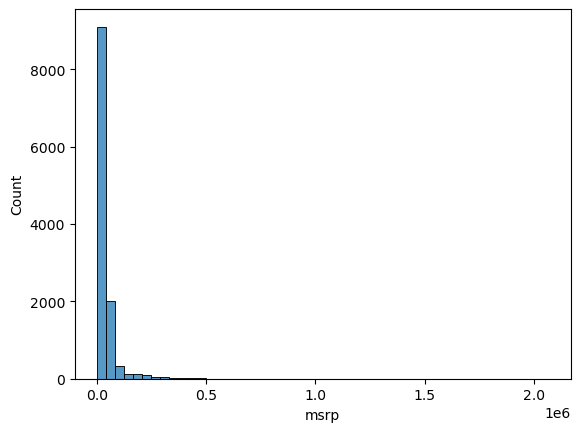

In [24]:
sns.histplot(df.msrp, bins = 50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

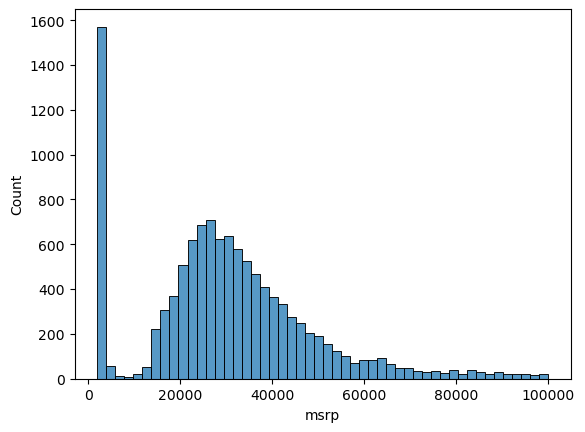

In [30]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

Long tail distributions confuse our model. So we need to convert this to log distibution. One problem is when you encounter 0 as log(0) doesn't exist. So you need to add some value to it and then take log. We can use log1p

<AxesSubplot:xlabel='msrp', ylabel='Count'>

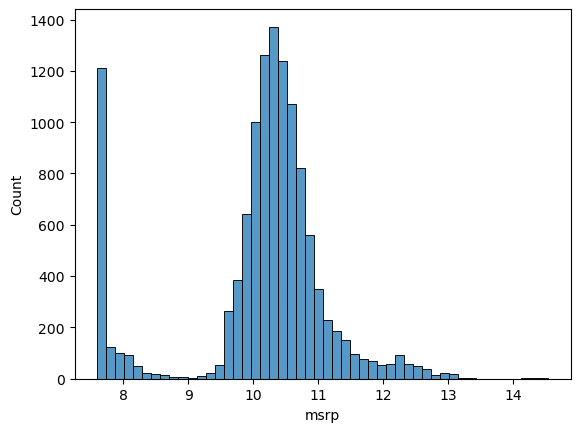

In [35]:
sns.histplot(np.log1p(df.msrp), bins = 50)
df.msrp = np.log1p(df.msrp)

Normal distributions better than long tail

## Missing Values

In [36]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting Up Validation Framework

In [50]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [51]:
n_train, n_val, n_test

(7150, 2382, 2382)

In [181]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [63]:
index = np.arange(n)

In [64]:
np.random.seed(2)
np.random.shuffle(index)

In [65]:
index

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [182]:
df_train = df.iloc[index[:n_train]]
df_val = df.iloc[index[n_train:n_train+n_val]]
df_test = df.iloc[index[n_train+n_val:]]

In [67]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [68]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [183]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [184]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [185]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [74]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


# Linear Regression

In [84]:
df.iloc[11]

make                                         bmw
model                                   1_series
year                                        2013
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  230.0
engine_cylinders                             6.0
transmission_type                         manual
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category               luxury,performance
vehicle_size                             compact
vehicle_style                              coupe
highway_mpg                                   28
city_mpg                                      19
popularity                                  3916
msrp                                       31500
Name: 11, dtype: object

In [90]:
w0 = 7.17
w = [0.001, 0.0234, 0.00014]

In [91]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    for j in range(0, n):
        pred = pred + w[j] * xi[j]
    return pred

In [92]:
linear_regression([300, 20, 3916])

8.48624

In [93]:
np.expm1(8.48) 

4816.449896870594

# Linear regression in vector form

In [94]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [99]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [101]:
linear_regression([300, 20, 3916])

8.48624

In [102]:
w_new = [w0] + w

In [103]:
w_new

[7.17, 0.001, 0.0234, 0.00014]

In [104]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [105]:
linear_regression([300, 20, 3916])

8.48624

In [107]:
w0 = 7.17
w = [0.001, 0.0234, 0.00014]
w = [w0] + w

x1 = [1, 300, 20, 3916]
x2 = [1, 435, 11, 86]
x3 = [1, 148, 24, 1385]

X = [x1, x2, x3]
X = np.array(X)

In [108]:
X.dot(w_new)

array([8.48624, 7.87444, 8.0735 ])

In [110]:
def linear_regression(X):
    return X.dot(w)

In [111]:
linear_regression(X)

array([8.48624, 7.87444, 8.0735 ])

# Training regression model

In [146]:
X =  [
    [300, 20, 3916],
    [435, 11, 86],
    [248, 24, 1385],
    [200, 30, 396],
    [235, 72, 8633],
    [348, 15, 138],
    [330, 19, 36],
    [452, 12, 836],
    [149, 23, 125]
]    
X = np.array(X)
X

array([[ 300,   20, 3916],
       [ 435,   11,   86],
       [ 248,   24, 1385],
       [ 200,   30,  396],
       [ 235,   72, 8633],
       [ 348,   15,  138],
       [ 330,   19,   36],
       [ 452,   12,  836],
       [ 149,   23,  125]])

In [145]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [135]:
X = np.column_stack([ones, X])

In [136]:
XTX = X.T.dot(X) #Gram matrix
XTX

array([[9.0000000e+00, 2.5970000e+03, 2.2600000e+02, 1.5551000e+04],
       [2.5970000e+03, 8.5286300e+05, 5.7598000e+04, 3.9815460e+06],
       [2.2600000e+02, 5.7598000e+04, 8.4400000e+03, 7.6162300e+05],
       [1.5551000e+04, 3.9815460e+06, 7.6162300e+05, 9.2681043e+07]])

In [137]:
XTX_inverse = np.linalg.inv(XTX)
XTX_inverse

array([[ 3.07054007e+00, -6.23899934e-03, -6.70854056e-02,
         3.04104068e-04],
       [-6.23899934e-03,  1.51892094e-05,  1.07655601e-04,
        -4.90357442e-07],
       [-6.70854056e-02,  1.07655601e-04,  2.25097686e-03,
        -1.18663569e-05],
       [ 3.04104068e-04, -4.90357442e-07, -1.18663569e-05,
         7.83434072e-08]])

In [138]:
XTX.dot(XTX_inverse)

array([[ 1.00000000e+00,  0.00000000e+00, -8.32667268e-17,
         2.10064171e-19],
       [ 1.81898940e-12,  1.00000000e+00, -3.55271368e-14,
         4.16333634e-17],
       [ 7.10542736e-14, -2.22044605e-16,  1.00000000e+00,
         0.00000000e+00],
       [ 4.54747351e-13, -5.32907052e-15, -1.13686838e-13,
         1.00000000e+00]])

In [139]:
y = [100, 250, 150, 200, 350, 125, 170, 450, 500]

In [140]:
w_full = XTX_inverse.dot(X.T).dot(y)
w_full

array([ 6.76115109e+01,  2.92253968e-01,  6.08100906e+00, -2.87309627e-02])

In [141]:
w0 = w_full[0]
w = w_full[1:]

In [142]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X) #Gram matrix
    XTX_inverse = np.linalg.inv(XTX)
    w_full = XTX_inverse.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [147]:
train_linear_regression(X, y)

(111.6801744512583, array([ 0.18051408,  5.26694496, -0.024905  ]))

# Car Baseline Model

In [148]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [149]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [150]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [155]:
num_cols = [ 'engine_hp', 'engine_cylinders', 'number_of_doors', 'highway_mpg', 'city_mpg', 'popularity']

In [156]:
df_train[num_cols].head()

,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity
0,148.0,4.0,2.0,33,24,1385
1,132.0,4.0,4.0,32,25,2031
2,148.0,4.0,4.0,37,28,640
3,90.0,4.0,3.0,18,16,873
4,385.0,8.0,4.0,21,15,5657


In [159]:
X_train = df_train[num_cols].fillna(0).values

In [160]:
X_train

array([[1.480e+02, 4.000e+00, 2.000e+00, 3.300e+01, 2.400e+01, 1.385e+03],
       [1.320e+02, 4.000e+00, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03],
       [1.480e+02, 4.000e+00, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02],
       ...,
       [2.850e+02, 6.000e+00, 4.000e+00, 2.200e+01, 1.700e+01, 5.490e+02],
       [5.630e+02, 1.200e+01, 4.000e+00, 2.100e+01, 1.300e+01, 8.600e+01],
       [2.000e+02, 4.000e+00, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02]])

In [162]:
w0, w = train_linear_regression(X_train, y_train)

In [163]:
y_pred = w0 + X_train.dot(w)

In [164]:
y_pred

array([ 9.26561572,  9.4775669 ,  9.75393382, ..., 10.40828408,
       12.14532154, 10.08298804])

<AxesSubplot:ylabel='Count'>

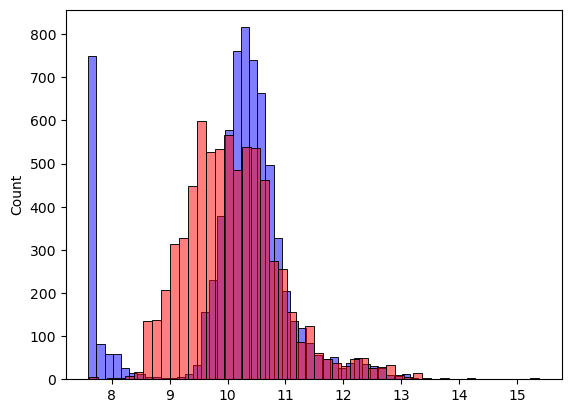

In [167]:
sns.histplot(y_train, color = 'blue', bins = 50, alpha = 0.5)
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5)

# RMSE

In [168]:
def rmse(y, y_pred):
    error = y - y_pred
    sq_error = error ** 2
    mse = sq_error.mean()
    return np.sqrt(mse)

In [169]:
rmse(y_train, y_pred)

0.737655612196539

# Validating Model

In [173]:
def prepare_X(df):
    df_num = df[num_cols]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [186]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [187]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [189]:
rmse(y_val, y_pred)

0.7456983962305089

# Feature Engineering

In [191]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [224]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = num_cols + ['age']
    df_features = df[features]
    df_features = df_features.fillna(0)
    X = df_features.values
    return X

In [225]:
X_train = prepare_X(df_train)

In [226]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [227]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [228]:
rmse(y_val, y_pred)

0.5168234951483364

<AxesSubplot:ylabel='Count'>

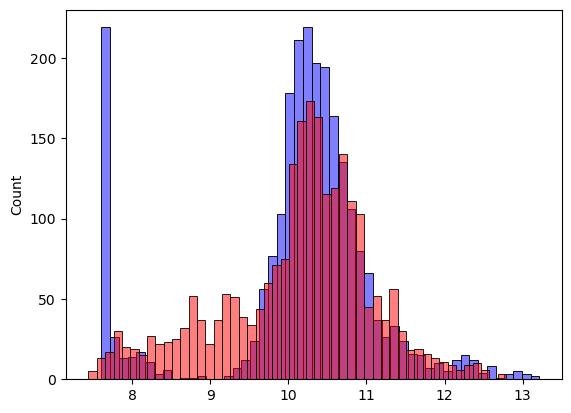

In [202]:
sns.histplot(y_val, color = 'blue', bins = 50, alpha = 0.5)
sns.histplot(y_pred, color = 'red', bins = 50, alpha = 0.5)

# Categorical variables

In [208]:
# for v in [2,3,4]:
#     df_train['num_of_doors_%s' %v] = (df_train.number_of_doors == v).astype('int')

In [209]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,num_of_doors_2,num_of_doors_3,num_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1


In [272]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = num_cols + ['age']
    
    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' %v)
    
    df_features = df[features]
    df_features = df_features.fillna(0)
    X = df_features.values
    return X

In [273]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [274]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [275]:
rmse(y_val, y_pred)

11.520167189975478

In [276]:
makes = list(df.make.value_counts().head().index)

In [277]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = num_cols + ['age']
    
    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' %v)
        
    for v in makes:
        df['make_%s' %v] = (df.make == v).astype('int')
        features.append('make_%s' %v)
    
    df_features = df[features]
    df_features = df_features.fillna(0)
    X = df_features.values
    return X

In [278]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

In [279]:
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

In [280]:
rmse(y_val, y_pred)

13.886567594602058

In [264]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [265]:
categories = ['make', 'model', 'engine_fuel_type', 'transmission_type', 'transmission_type', 'market_category', 'vehicle_size', 'vehicle_style']

In [266]:
category_values = {}

for c in categories:
    category_values[c] =list(df[c].value_counts().head().index)

In [267]:
category_values

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'model': ['silverado_1500',
  'tundra',
  'f-150',
  'sierra_1500',
  'beetle_convertible'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [288]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = num_cols + ['age']
    
    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' %v)
        
    for c, values in category_values.items():
        for v in values:
            df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' %(c, v))
    
    df_features = df[features]
    df_features = df_features.fillna(0)
    X = df_features.values
    return X

In [289]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

100.0928721969649

# Regularization

In [290]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X) #Gram matrix
    XTX = XTX + r * np.eye(XTX.shape[0])     # Regularization
    
    XTX_inverse = np.linalg.inv(XTX)
    
    w_full = XTX_inverse.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [291]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)


rmse(y_val, y_pred)

0.4535644974572278

In [295]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.1)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4536187201675377

# Tuning the model

In [298]:
for r in [0.0, 0.000001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    print(r, w0, rmse(y_val, y_pred))

0.0 -173700277630581.0 100.0928721969649
1e-06 188.7713085591103 0.45356384183672876
0.0001 7.321873550173628 0.4535640318590038
0.01 7.308919373159615 0.45356917432777105
0.1 7.2145643590925115 0.4536187201675377
1 6.419340600157639 0.45431622542563826
10 3.5662459354864504 0.46381900879493093
100 1.5318239881406799 0.5217363365832414
1000 0.5548617118476843 0.7965404592728034


In [314]:
r = 0.0001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4535644974572278

# Using the model

In [318]:
df_full_train  = pd.concat([df_train, df_val]).reset_index()

In [319]:
df_full_train.head()

,index,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657


In [323]:
reg=0.0001

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=reg)

In [324]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)

In [325]:
rmse(y_test, y_pred)

0.44916422898127883

In [330]:
category_values = {}

for c in categories:
    category_values[c] =list(df[c].value_counts().head(9).index)

def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = num_cols + ['age']
    
    for v in [2,3,4]:
        df['num_of_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('num_of_doors_%s' %v)
        
    for c, values in category_values.items():
        for v in values:
            df['%s_%s' %(c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' %(c, v))
    
    df_features = df[features]
    df_features = df_features.fillna(0)
    X = df_features.values
    return X

In [331]:
for r in [0.0, 0.000001, 0.0001, 0.01, 0.1, 1, 10, 100, 1000]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    print(r, w0, rmse(y_val, y_pred))

0.0 419483952844123.75 86.28596982949972
1e-06 403.42330725259103 0.4404881750343324
0.0001 7.335149557398435 0.44048674520655806
0.01 7.2204784107108475 0.44044066765043055
0.1 6.906905415825554 0.44040466857829624
1 6.010577794479044 0.4412838400554136
10 3.4780864985891364 0.45039575200181653
100 1.5198398538278906 0.5146404363215606
1000 0.5480550849176267 0.7909465627487816


https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/notebook.ipynb

# 2.16 Next steps
- We included only 5 top features. What happens if we include 10?
- Other projects

# Predict the price of a house - e.g. boston dataset
- https://archive.ics.uci.edu/ml/datasets.php?task=reg
- https://archive.ics.uci.edu/ml/datasets/Student+Performance

# 2.17 Summary
- EDA - looking at data, finding missing values
- Target variable distribution - long tail => bell shaped curve
- Validation framework: train/val/test split (helped us detect problems)
- Normal equation - not magic, but math
- Implemented it with numpy
- RMSE to validate our model
- Feature engineering: age, categorical features
- Regularization to fight numerical instability